In [1]:
import pandas as pd
import seaborn as sns
import itertools
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
import numpy as np
infile='/Users/irffanalahi/Research/Research_update/SoftRD/compareBetweenRefernces/Fresh/Mel_and_pbmc/EXTENDEDSM/Allcelltypes_corr/boxplots/try1_spearman_correlationbox.txt'
ylabel='Spearman rho'
title='Correlation with Flow'

stubnamestouse=['Soft RC']
suffixtouse='(!?Weighted_by_delta|Relative)'
indf=pd.read_csv(infile,sep='\t')
indf.head()

,celltype,SoftRC_Weighted_by_delta,SoftRC_Relative
0,Naive CD8 T,0.357143,0.357143
1,CD4 effector memory,0.785714,0.785714
2,CD8 central memory,0.882919,0.882919
3,Memory B,0.857143,0.857143
4,CD8 effector,0.558581,0.558581


In [4]:
def plotter(currentdf):

    melteddf=currentdf.melt(id_vars='celltype')
    
    order = ['SoftRC_Weighted_by_delta','SoftRC_Relative']

    ax=sns.boxplot(x="variable", y="value", data=melteddf,color='white',order=order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax = sns.stripplot(x="variable", y="value", data=melteddf, hue='celltype',palette='Set2',order=order)

    test_results = add_stat_annotation(ax,x="variable", y="value", data=melteddf,order=order,
                                   box_pairs=[("SoftRC_Weighted_by_delta", "SoftRC_Relative")],perform_stat_test=False, pvalues=[1],
                    test=None, text_format='simple', loc='inside')
    
    ax.legend(loc=(1.04,0))

SoftRC_Weighted_by_delta v.s. SoftRC_Relative: Custom statistical test, P_val:1.000e+00


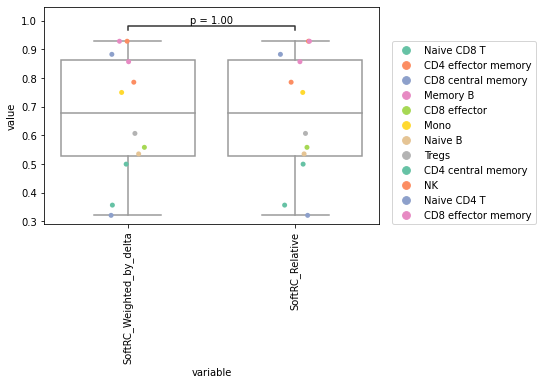

In [5]:
plotter(indf)

In [ ]:
#indf['id']=indf.index
df = pd.wide_to_long(indf, stubnames=stubnamestouse, i='celltype', j='method',suffix=suffixtouse,sep='_').reset_index()
df.head()

In [ ]:
dfmelt = df.melt(id_vars=['SM','celltype'])
dfmelt

In [ ]:
uniqeSM=list(set(dfmelt['SM'].tolist()))
uniqeVariable=list(set(dfmelt['variable'].tolist()))
boxtouse=list(itertools.product(uniqeVariable,uniqeSM))
#boxtouse=list(itertools.product(boxtouse,boxtouse))
boxtouse

In [ ]:

order =stubnamestouse #np.unique(np.array(dfmelt['variable']))[::-1]
#print(np.unique(np.array(dfmelt['variable'])))
#print(order)
cells = np.unique(np.array(dfmelt['celltype']))
#colors = sns.color_palette("gist_ncar", len(cells))
colors = ['b','c','g','r','m','y','tab:blue','tab:orange','tab:purple','tab:pink','darkviolet','dodgerblue', 'coral', 'brown']

#colors = sns.color_palette('Set2',len(cells))


ax=sns.boxplot(x="variable", y="value", data=dfmelt,hue='SM',palette='pastel', order=order)
for i, cell in enumerate(cells):
    sns.stripplot(x="variable", y="value", data=dfmelt[dfmelt['celltype'] == cell],hue='SM',\
                     dodge=True,marker='o', ax=ax,palette=[colors[i]] * 2, order=order)
    #sns.stripplot(x="variable", y="value", data=dfmelt[dfmelt['celltype'] == cell],hue='SM',\
     #                 dodge=True,marker='o', ax=ax,color=colors[i], order=order)
add_stat_annotation(ax, x="variable", y="value", data=dfmelt,hue='SM',
                    box_pairs=[(('Maxscore_based_fraction', 'TieredSM'),('Maxscore_based_fraction', 'RankedSM')),(('Relative_fraction', 'TieredSM'),('Relative_fraction', 'RankedSM')),(('score', 'TieredSM'),('score', 'RankedSM'))],test='Wilcoxon', text_format='simple', loc='inside') #[( ( "score","RankedSM"),( "score","TieredSM")),( ( "Oldcellularfraction","RankedSM"),( "Oldcellularfraction","TieredSM")),( ( "Maxscore_basedcellularfraction","RankedSM"),( "Maxscore_basedcellularfraction","TieredSM"))]
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel(ylabel)
ax.set_xlabel('methods')
ax.set_title(title)
handles, labels = ax.get_legend_handles_labels()
handles_new = handles[:2]
for i in range(2, len(handles), 2):
    handles_new += [handles[i]]
labels = labels[:2] + list(cells)
ax.legend(handles_new, labels, bbox_to_anchor=(1.01, 1.0), loc='upper left')
#ax.legend(loc=(1.01, 0.0))
# specify just one legend
# l = plt.legend(loc=(1.02, 0.01))
#ax.legend(loc=(1.04,0))

plt.savefig(infile + '_boxplot.pdf', bbox_inches='tight')